Importing Libraries and Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("seer_breast_cancer.csv")
df.head()


,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


Checking the dataset

In [38]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

Age                        40
Race                        3
Marital Status              5
Unnamed: 3                  0
T Stage                     4
N Stage                     3
6th Stage                   5
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

Preprocessing - encoding categorical data

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Identify numerical and categorical features
num_features = df.select_dtypes(include=["number"]).columns
cat_features = df.select_dtypes(include=["object"]).columns

# Impute numerical features with median
num_imputer = SimpleImputer(strategy="median")
transformed_data = num_imputer.fit_transform(df[num_features])

# Convert back to DataFrame (handling shape mismatch if any columns get dropped)
df_imputed = pd.DataFrame(transformed_data, columns=num_features[:transformed_data.shape[1]], index=df.index)

# Update only existing columns
df.update(df_imputed)

# Encode categorical features
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle NaNs safely
    label_encoders[col] = le


c:\Users\Sandhya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 3']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Defining Features and Target variable

In [5]:
X = df.drop(columns=['Status'])  # Features
y = df['Status']  # Target


Splitting data into Training set and Testing set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalizing Data

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training the model using Random Forest Classifier

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Making Predictions

In [10]:
y_pred = clf.predict(X_test)

Evaluating the model

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9043478260869565

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       672
           1       0.78      0.59      0.67       133

    accuracy                           0.90       805
   macro avg       0.85      0.78      0.81       805
weighted avg       0.90      0.90      0.90       805


Confusion Matrix:
 [[650  22]
 [ 55  78]]


Feature Importance Analysis

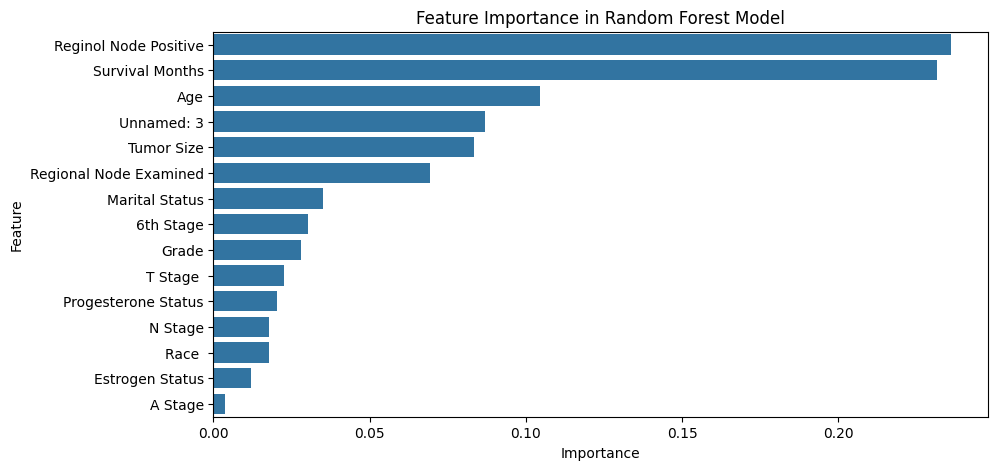

In [12]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance in Random Forest Model")
plt.show()

Saving the Model

In [13]:
import joblib
joblib.dump(clf, "breast_cancer_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Load and use model

In [14]:
clf_loaded = joblib.load("breast_cancer_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")

sample_input = np.array([X_test[0]])  # Modify with real input
sample_input_scaled = scaler_loaded.transform(sample_input)
prediction = clf_loaded.predict(sample_input_scaled)

print("Predicted Survival Status:", prediction)

Predicted Survival Status: [0]


In [15]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train your model again
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Ensure X_train and y_train are correctly defined

# Save model properly
with open("breast_cancer_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!
